# counting

In [ ]:
def count_comments(data):
    # Iterate over the 'stories' list within the data dictionary
    return len(data['stories']), sum(len(story['kids_text']) for story in data['stories'])

## github projects only

In [ ]:
import json

HN_COMMENTS_JSON = ''
with open(HN_COMMENTS_JSON) as f:
    data = json.load(f)

num_stories, num_comments = count_comments(data)
print(f"Total number of stories: {num_stories}")
print(f"Total number of comments: {num_comments}")

Total number of stories: 4645
Total number of comments: 78541


## all discussions

In [ ]:
HN_COMMENTS_GH_JSON = ''
with open(HN_COMMENTS_GH_JSON) as f:
    data = json.load(f)

num_stories, num_comments = count_comments(data)
print(f"Total number of stories: {num_stories}")
print(f"Total number of comments: {num_comments}")

Total number of stories: 4645
Total number of comments: 78541


# show comments statistics

In [ ]:
import pandas as pd

def get_comment_statistics(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Group by 'discussion_id' and count the number of comments in each story
    comment_counts = df.groupby('discussion_id').size().reset_index(name='num_comments')

    # Calculate overall statistics
    total_stories = comment_counts['discussion_id'].nunique()
    total_comments = comment_counts['num_comments'].sum()
    max_comments = comment_counts['num_comments'].max()
    min_comments = comment_counts['num_comments'].min()
    avg_comments = comment_counts['num_comments'].mean()

    # Print the statistics
    print(f"Total number of stories: {total_stories}")
    print(f"Total number of comments: {total_comments}")
    print(f"Average number of comments per story: {avg_comments:.2f}")
    print(f"Max number of comments in a story: {max_comments}")
    print(f"Min number of comments in a story: {min_comments}")

    # Return the DataFrame containing the number of comments per story
    return comment_counts


In [ ]:
# Example usage:
HN_COMMENTS_GH_CSV = ''
comment_stats = get_comment_statistics(HN_COMMENTS_GH_CSV)
print(comment_stats)

Total number of stories: 348
Total number of comments: 4707
Average number of comments per story: 13.53
Max number of comments in a story: 98
Min number of comments in a story: 1
     discussion_id  num_comments
0         31355348             7
1         31405976             6
2         31846593            41
3         32458048            10
4         32628761            21
..             ...           ...
343       40226976             9
344       40237305             4
345       40252569            42
346       40285986             3
347       40291780             4

[348 rows x 2 columns]


# plotting comment trend histogram

## setup method

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.rcParams.update({'font.size': 18})

def plot_comments_histogram(title, csv_file_path, bin_size_days=7):
    """
    Plot a histogram of AI discussion comments over time from a CSV file.

    Args:
    title (str): graph title
    csv_file_path (str): The path to the CSV file.
    bin_size_days (int): The size of each bin in days.
    """
    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    # Convert comment_date to datetime
    df['comment_date'] = pd.to_datetime(df['comment_date'])

    # Create the histogram
    fig, ax = plt.subplots(figsize=(15, 7))

    # Calculate bin edges from May 2022 to May 2024
    start_date = pd.Timestamp('2022-05-08').timestamp()
    end_date = pd.Timestamp('2024-05-09').timestamp()

    # Based on the start_id and end_id defined above
    total_days = (end_date - start_date) / (24*60*60)
    bins = int(total_days / bin_size_days)

    n, bins, patches = ax.hist(df['comment_date'], bins=bins, edgecolor='black')

    # Format x-axis ticks as dates
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

    # Set the number of ticks on the x-axis
    num_ticks = 12
    ax.xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator(maxticks=num_ticks))

    # plt.title(f'{title} (Bin Size: {bin_size_days} days)')
    plt.xlabel('Date')
    plt.ylabel('Number of Comments')
    plt.xticks(rotation=45)

    # Add vertical line for ChatGPT release
    chatgpt_release = pd.Timestamp('2022-11-30')
    plt.axvline(x=chatgpt_release, color='r', linestyle='--', label='ChatGPT Release')
    plt.legend()
    plt.grid(visible=True, alpha=0.7)

    plt.tight_layout()
    plt.show()


## github projects only

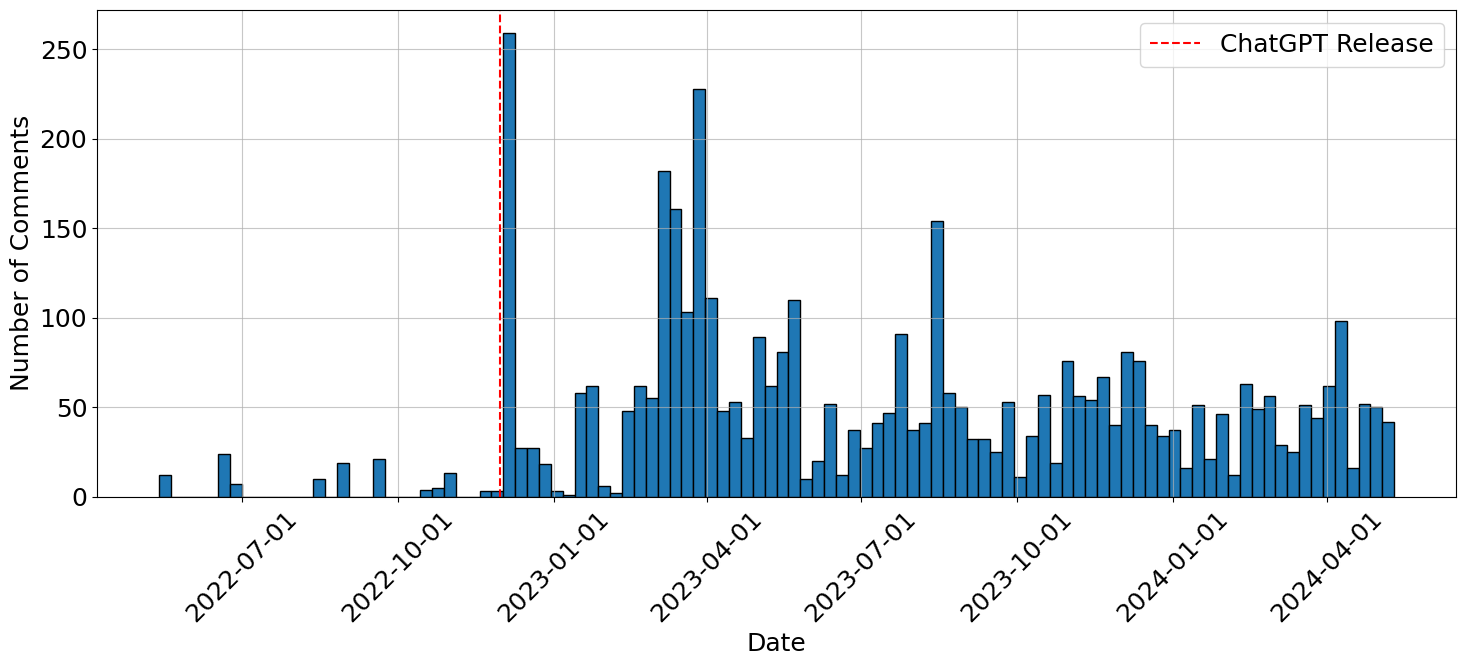

In [9]:
HN_COMMENTS_GH_CSV = '/content/drive/MyDrive/datasets/muict-naist-senior/rq1/rq1_freq_analysis/rq1_comments_github_clean.csv'
HN_COMMENTS_CSV = ''
plot_comments_histogram(
    # "HN Discussion comment trend histogram (GitHub projects only)",
    "",
    HN_COMMENTS_GH_CSV,
    bin_size_days=7)
# plot_comments_histogram("HN Discussion comment trend histogram (full)", HN_COMMENTS_CSV, bin_size_days=7)
# plot_comments_histogram("HN Discussion comment trend histogram (github projects only)", HN_COMMENTS_GH_CSV, bin_size_days=30)

# calculating trend statistics